#FloPy3
##Plotting Model Arrays and Results
This notebook demonstrates the simple array and results plotting capabilities of flopy.  It demonstrates these capabilities by loading and running an existing model, and then showing how the `.plot()` and `.plot_data()` methods can be used to make simple plots of the model data and model results.

In [1]:
%matplotlib inline
import sys
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set name of MODFLOW exe
#  assumes executable is in users path statement
version = 'mf2005'
exe_name = 'mf2005'
if platform.system() == 'Windows':
    exe_name = 'mf2005.exe'
mfexe = exe_name

#Set the paths
loadpth = os.path.join('..', 'data', 'secp')
modelpth = os.path.join('data')

#make sure modelpth directory exists
if not os.path.exists(modelpth):
    os.makedirs(modelpth)
    
files = ['secp.hds']

###Load and Run an Existing Model
A model called the "Southeast Coastal Plain Model" is located in the loadpth folder.  In the following code block, we load that model, then change into a new workspace (modelpth) where we recreate and run the model.  For this to work properly, the MODFLOW-2005 executable (mf2005) must be in the path.  We verify that it worked correctly by checking for the presence of secp.hds.

In [2]:
ml = flopy.modflow.Modflow.load('secp.nam', model_ws=loadpth, 
                                exe_name=exe_name, version=version)
ml.change_model_ws(new_pth=modelpth)
ml.write_input()

temporalReference warning: not dealing with steady state yet

changing model workspace...
   data


success, buff = ml.run_model(silent=True)

if not success:
    print ('Something bad happened.')

#--confirm that the model files have been created
for f in files:
    if os.path.isfile(os.path.join(modelpth, f)):
        msg = 'Output file located: {}'.format(f)
        print (msg)
    else:
        errmsg = 'Error. Output file cannot be found: {}'.format(f)
        print (errmsg)

###Plotting Model Data
Once a model object is created MODFLOW package data can be plotted using the `.plot()` method.

Two-dimensional data (for example the model top) can be plotted by calling the `.plot()` method for each data array.

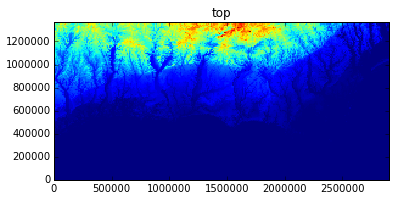

In [3]:
ml.dis.top.plot()

As you can see, the `.plot()` methods returns a `matplotlib.pyplot` axis object, which can be used to add additional data to the figure. Below we will add black contours to the axis returned in the first line.

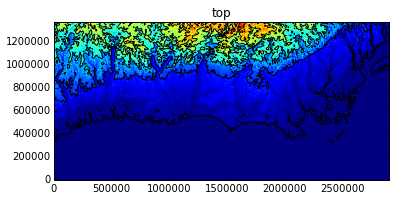

In [4]:
ax = ml.dis.top.plot()
ml.dis.top.plot(axes=ax, contour=True, pcolor=False)

You will notice that we passed several keywords in the second line. There are a number of keywords that can be passed to the `.plot()` and `.plot_data()` method to control plotting. Available keywords are:

1. `axes` -- if you already have plot axes you can pass them to the method
2. `pcolor` -- turns pcolor on if `pcolor=True` or off if `pcolor=False`, default is `pcolor=True`
3. `colorbar` -- turns on colorbar if `colorbar=True` or off if `colorbar=False`, default is `colorbar=False`
4. `contour` -- turns on contours if `contour=True` or off if `contour=False`, default is `contour=False`
5. `clabel` -- turns on contour labels if `clabel=True` or off if `clabel=False`, default is `clabel=False` and is only relevant if `contour=True`
6. `grid` -- turns on model grid if `grid=True` or off if `grid=False`, default is `grid=False`
7. `masked_values` - list with unique values to be excluded from the plot (for example, HNOFLO)
8. `mflay` -- for three-dimensional data (for example layer bottoms or simulated heads) `mflay` can be used to plot data for a single layer -- note `mflay` is zero-based
9. `kper` -- for transient two-dimensional data (for example recharge package data) `kper` can be used to plot data for a single stress period -- note `kper` is zero-based
10. `filenames` -- list of file names to use to save figure data -- by default generic file names are automatically created for three-dimensional and transient two-dimensional data -- user's only need to provide file names if user-specified file names are desired -- if `mflay` or `kper` are specified only one file name needs to be specified
11. `file_extension` -- valid `matplotlib` file extension, default is `png` and is only relevant if `filenames` are specified

The previous code block is recreated in a single line using keywords in the code block below.

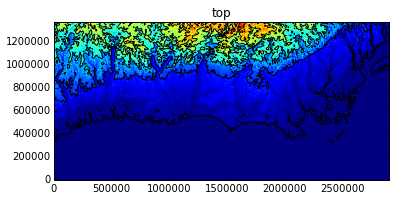

In [5]:
ml.dis.top.plot(contour=True)

We can save the same image to a file.

In [6]:
fname = os.path.join(modelpth, 'secp')
ml.dis.top.plot(contour=True, filename_base=fname)

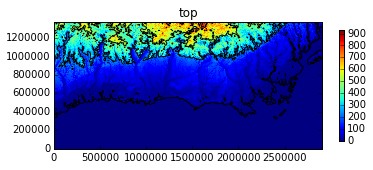

In [7]:
ml.dis.top.plot(colorbar=True, 
                contour=True, levels=[0, 250, 500, 750], colors='black', linewidths=2)

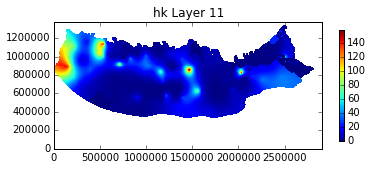

In [8]:
ml.lpf.hk.plot(mflay=10, masked_values=[0.], colorbar=True)

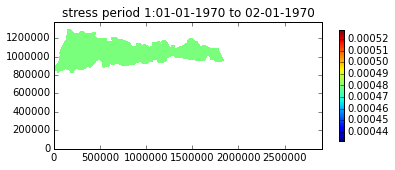

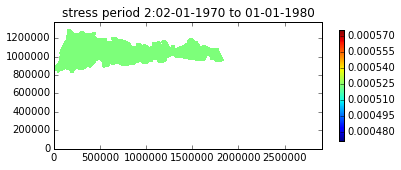

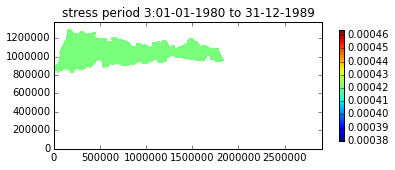

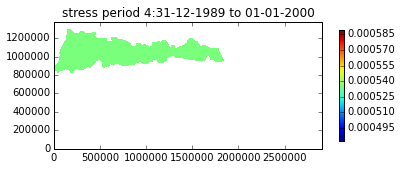

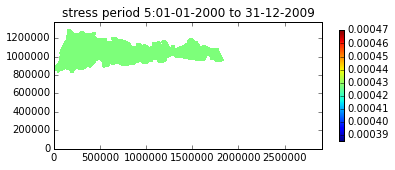

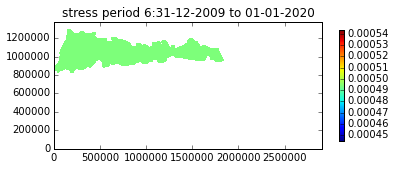

In [9]:
ml.rch.rech.plot(masked_values=[0.], colorbar=True)

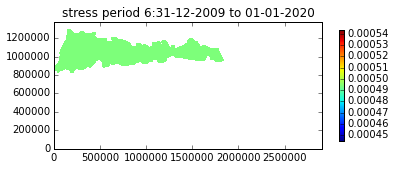

In [10]:
ml.rch.rech.plot(kper=5, masked_values=[0.], colorbar=True)

In [11]:
fr = os.path.join(modelpth, 'secp_rch')
ml.rch.rech.plot(kper=5, masked_values=[0.], colorbar=True,
                 filename_base=fr)

[None]

In [12]:
fr = os.path.join(modelpth, 'secp_rcha')
ml.rch.rech.plot(masked_values=[0.], colorbar=True,
                 filename_base=fr)

[None, None, None, None, None, None]

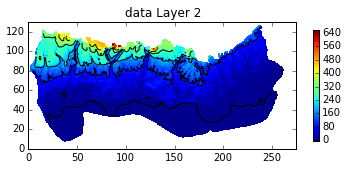

In [13]:
fname = os.path.join(modelpth, files[0])
hdobj = flopy.utils.HeadFile(fname)
times = hdobj.get_times()
head = hdobj.plot_data(totim=times[-1], mflay=1, 
                       masked_values=[-9999.0, -888.0],
                       colorbar=True,
                       contour=True, colors='black')

In [14]:
fh = os.path.join(modelpth, 'secp_head')
head = hdobj.plot_data(totim=times[-1], mflay=1, 
                       masked_values=[-9999.0, -888.0],
                       colorbar=True,
                       contour=True, colors='black',
                       filename_base=fh)

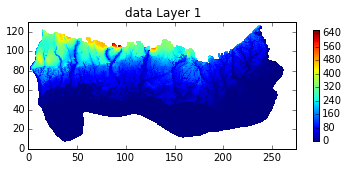

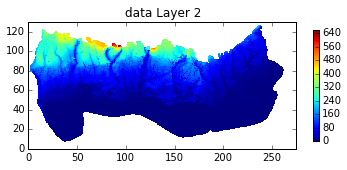

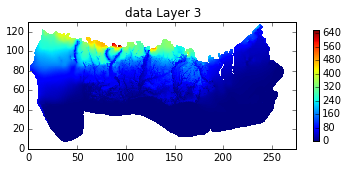

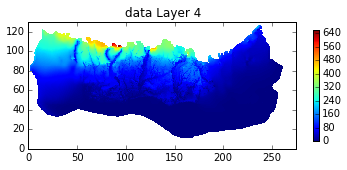

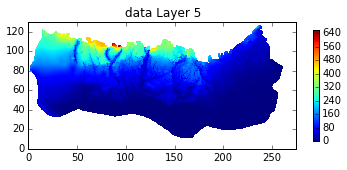

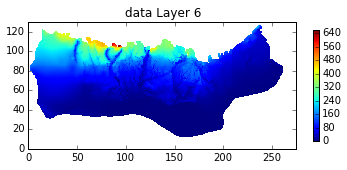

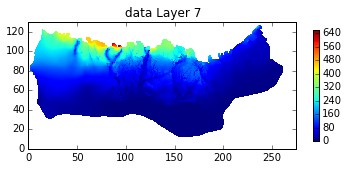

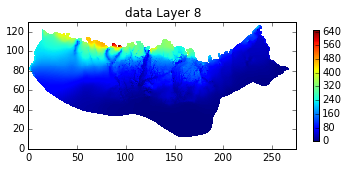

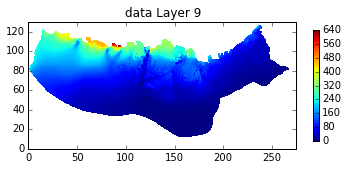

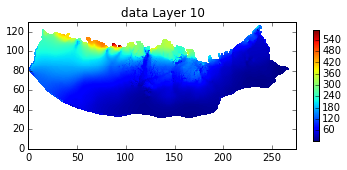

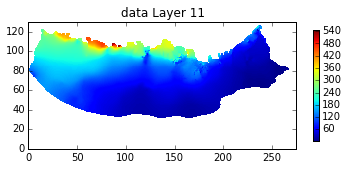

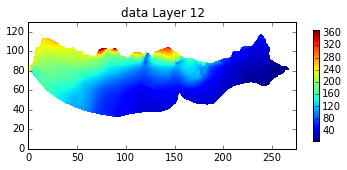

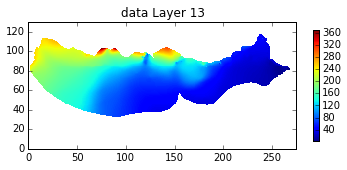

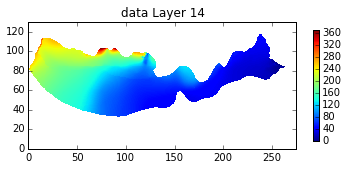

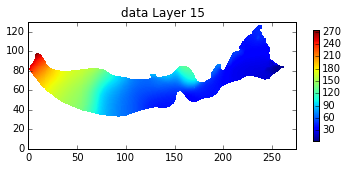

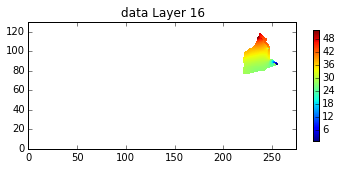

In [15]:
head = hdobj.plot_data(totim=times[0], 
                       masked_values=[-9999.0, -888.0],
                       colorbar=True)

##Summary

This notebook demonstrates some of the simple plotting functionality available with flopy.  Although not described here, the plotting functionality tries to be general by passing keyword arguments passed to the `plot()` and `plot_data()` methods down into the `matplot.pyplot` routines that do the actual plotting.  For those looking to customize these plots, it may be necessary to search for the available keywords.  The `plot()` and `plot_data()` methods return the `matplot.pyplot` axis objects that are created (or passed). These axes objects can be used to plot additional data (except when plots are saved as image files).

Hope this gets you started!